In [1]:
from unet_instance import UNetModel

c:\Users\rz200\Anaconda3\envs\cellprob\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#import the data
import ezomero
from omero_data import connect, extract_channel, progressbar

conn = connect(user='rz200',password='omeroreset')
plate = 1237
image_ids = ezomero.get_image_ids(conn,plate=plate)[:2]

print('In plate',plate,'we have',len(image_ids),'images')

data_images = []
for i in progressbar(range(len(image_ids)), "Computing: ", 40):
    data_images.append(ezomero.get_image(conn, image_ids[i])[1])

data_images_one = extract_channel(data_images, 0)
data_images_two = extract_channel(data_images, 1)

Connection successful
In plate 1237 we have 2 images
Computing: [########################################] 2/2



In [3]:
model = UNetModel() #might need to add a 'del' function or clearing of the gpu
model.load_weights('C:/Users/rz200/Documents/development/distillCellSegTrack/pipeline/unet_nuclei_hoechst_test_2')
predictions = model.predict(data_images_one[0])

In [4]:
print(len(predictions))

1


In [5]:
!nvidia-smi

Tue Jun 27 15:34:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.01       Driver Version: 516.01       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P1000       WDDM  | 00000000:01:00.0  On |                  N/A |
| 35%   50C    P5    N/A /  N/A |    669MiB /  4096MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

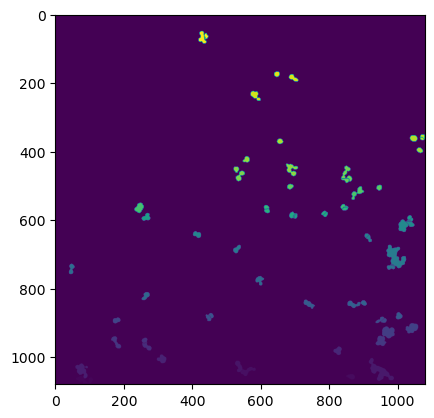

In [6]:
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

plt.imshow(predictions[0])

In [7]:
import gc
import torch
torch.cuda.empty_cache()
gc.collect()

2979

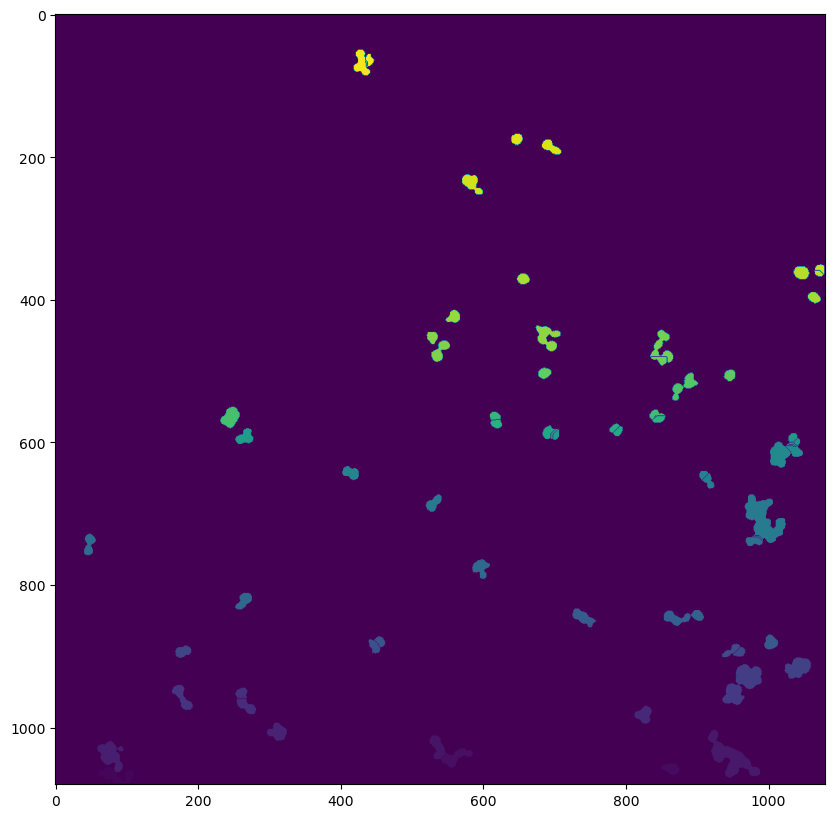

In [8]:
import matplotlib.pyplot as plt

for i in range(len(predictions)):
    plt.figure(figsize=(10,10))
    plt.imshow(predictions[i])
    plt.show()
